<a href="https://colab.research.google.com/github/beyzaturku/Weather_Detection_Using_CNN/blob/main/Dehazing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SRCNN

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# SRCNN Modelini Tanımla
def build_srcnn():
    model = Sequential([
        Conv2D(64, (9, 9), activation='relu', padding='same', input_shape=(None, None, 1)),
        Conv2D(32, (5, 5), activation='relu', padding='same'),
        Conv2D(1, (5, 5), activation='linear', padding='same')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

In [12]:
# Veri Hazırlığı (Görüntüyü Yükle, Düşük Çözünürlüklü Hale Getir)
image_path = "/content/drive/MyDrive/Weather_Detection/New_Dataset/Fogsmog/4200.jpg"

def preprocess_image(image_path):
    # Use the image_path argument directly to ensure the correct path is used
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Gri tonlamalı oku

    # Check if image was loaded successfully
    if img is None:
        raise ValueError(f"Image not found at path: {image_path}")

    img = cv2.resize(img, None, fx=0.5, fy=0.5)  # Düşük çözünürlüklü yap
    img = cv2.resize(img, (img.shape[1]*2, img.shape[0]*2))  # Eski çözünürlüğüne getir
    img = img.astype(np.float32) / 255.0  # Normalizasyon
    img = np.expand_dims(img, axis=[0, -1])  # Model girişi için boyut ekle
    return img

In [13]:
# Modeli Yükle ve Test Et
srcnn = build_srcnn()
low_res_image = preprocess_image(image_path)
high_res_pred = srcnn.predict(low_res_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


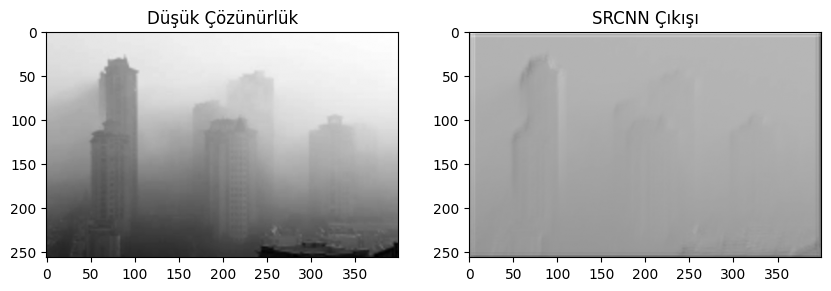

In [14]:
# Sonucu Görselleştir
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Düşük Çözünürlük')
plt.imshow(low_res_image[0,:,:,0], cmap='gray')
plt.subplot(1,2,2)
plt.title('SRCNN Çıkışı')
plt.imshow(high_res_pred[0,:,:,0], cmap='gray')
plt.show()

# SRCNN- 2


In [53]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [57]:
def load_images(image_paths):
    images = []
    for path in image_paths:
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img.astype(np.float32) / 255.0
        images.append(img)
    return np.array(images)

In [68]:
# Örnek görüntü yolları
image_paths = ['/content/drive/MyDrive/Weather_Detection/New_Dataset/Fogsmog/4085.jpg', '/content/drive/MyDrive/Weather_Detection/New_Dataset/Fogsmog/4237.jpg']
high_res_images = load_images(image_paths)

In [69]:
def load_images(image_paths, target_size=(256, 256)): # Define a target size
    images = []
    for path in image_paths:
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # Resize images to the target size before appending
        img = cv2.resize(img, target_size)
        img = img.astype(np.float32) / 255.0
        images.append(img)
    return np.array(images)

In [70]:
# 3. Veri Ön İşleme
def preprocess_images(high_res_images, scale_factor=2):
    low_res_images = []
    for img in high_res_images:
        h, w, _ = img.shape
        low_res = cv2.resize(img, (w // scale_factor, h // scale_factor), interpolation=cv2.INTER_CUBIC)
        low_res = cv2.resize(low_res, (w, h), interpolation=cv2.INTER_CUBIC)
        low_res_images.append(low_res)
    return np.array(low_res_images)

low_res_images = preprocess_images(high_res_images)

In [71]:
# Veri setini eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(low_res_images, high_res_images, test_size=0.2, random_state=42)

In [72]:
# 4. Modeli Oluşturma
def build_srcnn():
    model = models.Sequential()

    # İlk convolutional katman
    model.add(layers.Conv2D(64, (9, 9), padding='same', activation='relu', input_shape=(None, None, 3)))

    # İkinci convolutional katman
    model.add(layers.Conv2D(32, (1, 1), padding='same', activation='relu'))

    # Üçüncü convolutional katman
    model.add(layers.Conv2D(3, (5, 5), padding='same', activation='linear'))

    return model

srcnn_model = build_srcnn()
srcnn_model.compile(optimizer='adam', loss='mean_squared_error')

In [73]:
# 5. Modeli Eğitme
srcnn_model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4621 - val_loss: 0.1342
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.1851 - val_loss: 0.0167
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0304 - val_loss: 0.0323
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0459 - val_loss: 0.0681
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0816 - val_loss: 0.0502
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0532 - val_loss: 0.0312
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0264 - val_loss: 0.0181
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0137 - val_loss: 0.0146
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0157 - val_loss: 0.0156
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0234 - val_loss: 0.0134


In [74]:
# 6. Modeli Test Etme
def predict_high_res(image):
    return srcnn_model.predict(np.expand_dims(image, axis=0))[0]

high_res_predicted = predict_high_res(X_test[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


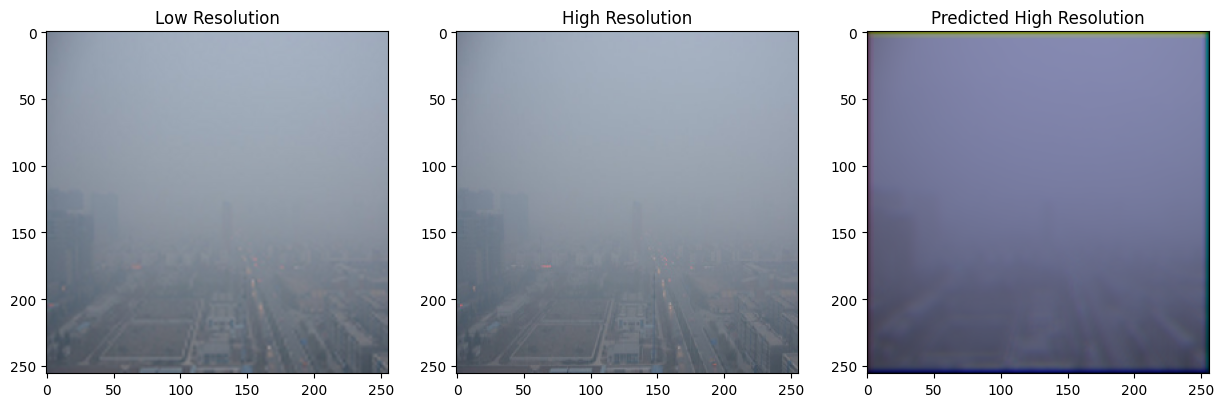

In [75]:
# 7. Sonuçları Görselleştirme
def plot_results(low_res, high_res, predicted):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title('Low Resolution')
    plt.imshow(low_res)

    plt.subplot(1, 3, 2)
    plt.title('High Resolution')
    plt.imshow(high_res)

    plt.subplot(1, 3, 3)
    plt.title('Predicted High Resolution')
    plt.imshow(predicted)

    plt.show()

plot_results(X_test[0], y_test[0], high_res_predicted)

# Sis Giderme (Dark Channel Prior)

In [106]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Görüntünün karanlık kanalları hesaplanır.
def dark_channel(image, window_size=15):
    min_channel = np.min(image, axis=2)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (window_size, window_size))
    dark = cv2.erode(min_channel, kernel)
    return dark

#Atmosferik ışık tahmin edilir.
def estimate_atmospheric_light(image, dark, top_percent=0.1):
    num_pixels = int(dark.shape[0] * dark.shape[1] * top_percent)
    flat_image = image.reshape(-1, 3)
    flat_dark = dark.reshape(-1)
    indices = np.argsort(flat_dark)[-num_pixels:]
    atmospheric_light = np.max(flat_image[indices], axis=0)
    return atmospheric_light

#İletim haritası tahmin edilir.
def estimate_transmission(image, atmospheric_light, window_size=15, omega=0.95):
    normalized_image = image / atmospheric_light
    dark = dark_channel(normalized_image, window_size)
    transmission = 1 - omega * dark
    return transmission

#Guided filtresi uygulanır.
def guided_filter(image, p, r=40, eps=1e-3):
    mean_I = cv2.boxFilter(image, cv2.CV_64F, (r, r))
    mean_p = cv2.boxFilter(p, cv2.CV_64F, (r, r))
    mean_Ip = cv2.boxFilter(image * p, cv2.CV_64F, (r, r))
    cov_Ip = mean_Ip - mean_I * mean_p

    mean_II = cv2.boxFilter(image * image, cv2.CV_64F, (r, r))
    var_I = mean_II - mean_I * mean_I

    a = cov_Ip / (var_I + eps)
    b = mean_p - a * mean_I

    mean_a = cv2.boxFilter(a, cv2.CV_64F, (r, r))
    mean_b = cv2.boxFilter(b, cv2.CV_64F, (r, r))

    q = mean_a * image + mean_b
    return q

#Görüntü Keskinleştirme
def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened_image = cv2.filter2D(image, -1, kernel)
    return sharpened_image

sharpened_image = sharpen_image(dehazed_image)

#CLAHE ile kontrast artırma
def enhance_contrast(image):
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l = clahe.apply(l)
    lab = cv2.merge((l, a, b))
    enhanced_image = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
    return enhanced_image

enhanced_image = enhance_contrast(dehazed_image)

In [107]:
#Sis giderme işlemi
def dehaze(image, window_size=15, omega=0.95, t0=0.1, r=40, eps=1e-3):
    image = image.astype(np.float32) / 255.0   # Görüntü normalize edilir

    dark = dark_channel(image, window_size) #Karanlık kanal hesaplanır

    atmospheric_light = estimate_atmospheric_light(image, dark) #Atmosferik ışık tahmin edilir

    transmission = estimate_transmission(image, atmospheric_light, window_size, omega) #iletim haritası tahmin edilir
    transmission = np.clip(transmission, t0, 1.0)

    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) # Guided Filter ile iletim haritası iyileştirilir
    refined_transmission = guided_filter(gray_image, transmission, r, eps)

    dehazed_image = np.zeros_like(image) #Sis giderilmiş görüntü hesaplanır
    for i in range(3):
        dehazed_image[:, :, i] = (image[:, :, i] - atmospheric_light[i]) / refined_transmission + atmospheric_light[i]

    dehazed_image = np.clip(dehazed_image, 0, 1)
    dehazed_image = (dehazed_image * 255).astype(np.uint8) # Görüntüyü [0, 1] aralığından [0, 255] aralığına dönüştürülür

    return dehazed_image

In [111]:
# Sisli görüntüyü yükle
hazy_image = cv2.imread('/content/drive/MyDrive/Weather_Detection/New_Dataset/Fogsmog/4720.jpg')
hazy_image = cv2.cvtColor(hazy_image, cv2.COLOR_BGR2RGB)

In [112]:
# Sis giderme işlemini uygula
dehazed_image = dehaze(hazy_image)

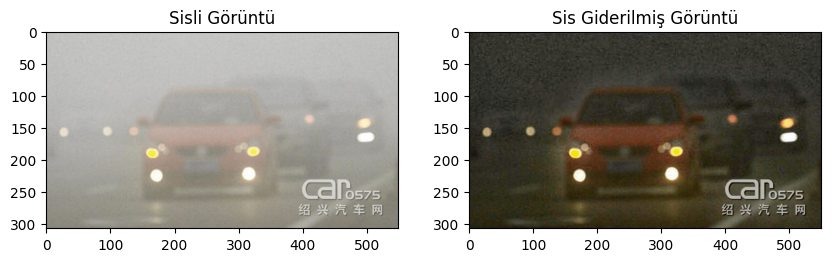

In [113]:
# Sonuçları görselleştir
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Sisli Görüntü')
plt.imshow(hazy_image)
plt.subplot(1, 2, 2)
plt.title('Sis Giderilmiş Görüntü')
plt.imshow(dehazed_image)
plt.show()